# WorldCoin Price Analysis and Prediction

### Import Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import  RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR


### Data Exploration

In [2]:
df = pd.read_csv("worldcoin-org_2023-07-24_2024-04-09.csv")
df.head()

,Start,End,Open,High,Low,Close,Volume,Market Cap
0,2024-04-08,2024-04-09,933.952836,967.209462,913.718538,948.117516,6.416583e+10,1.685649e+11
1,2024-04-07,2024-04-08,901.187578,948.936529,901.187578,931.382503,6.675005e+10,1.653840e+11
2,2024-04-06,2024-04-07,887.354051,935.367097,883.524831,902.722330,7.536231e+10,1.610354e+11
3,2024-04-05,2024-04-06,886.431619,902.019500,843.009636,891.403798,7.218241e+10,1.550940e+11
4,2024-04-04,2024-04-05,874.314414,924.103204,860.637373,890.984968,7.071743e+10,1.555043e+11


### Data cleaning

In [3]:
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])

In [4]:
df

,Start,End,Open,High,Low,Close,Volume,Market Cap
0,2024-04-08,2024-04-09,933.952836,967.209462,913.718538,948.117516,6.416583e+10,1.685649e+11
1,2024-04-07,2024-04-08,901.187578,948.936529,901.187578,931.382503,6.675005e+10,1.653840e+11
2,2024-04-06,2024-04-07,887.354051,935.367097,883.524831,902.722330,7.536231e+10,1.610354e+11
3,2024-04-05,2024-04-06,886.431619,902.019500,843.009636,891.403798,7.218241e+10,1.550940e+11
4,2024-04-04,2024-04-05,874.314414,924.103204,860.637373,890.984968,7.071743e+10,1.555043e+11
...,...,...,...,...,...,...,...,...
255,2023-07-28,2023-07-29,268.376455,288.763505,266.613366,287.867366,6.053932e+10,2.942581e+10
256,2023-07-27,2023-07-28,289.915922,298.136629,270.784285,272.091085,9.551170e+10,2.993751e+10
257,2023-07-26,2023-07-27,296.139778,323.946391,284.644027,291.424103,1.908799e+11,3.187994e+10
258,2023-07-25,2023-07-26,280.787901,312.054268,247.871080,295.356514,1.750890e+11,2.912702e+10


In [5]:
df.describe()

,Start,End,Open,High,Low,Close,Volume,Market Cap
count,260,260,260.000000,260.000000,260.000000,260.000000,2.600000e+02,2.600000e+02
mean,2023-11-30 12:00:00,2023-12-01 12:00:00,428.128292,456.595129,406.895936,430.899066,8.777281e+10,5.761901e+10
min,2023-07-24 00:00:00,2023-07-25 00:00:00,130.628158,134.368901,126.126759,130.422459,1.131871e+10,1.706201e+10
25%,2023-09-26 18:00:00,2023-09-27 18:00:00,217.709249,231.777113,211.904935,217.444531,2.760247e+10,2.664382e+10
50%,2023-11-30 12:00:00,2023-12-01 12:00:00,304.159352,321.952614,293.790649,305.286758,4.693849e+10,3.615002e+10
75%,2024-02-03 06:00:00,2024-02-04 06:00:00,459.214298,488.230294,442.078575,459.162266,9.688760e+10,4.837138e+10
max,2024-04-08 00:00:00,2024-04-09 00:00:00,1510.021753,1524.627098,1218.966481,1498.692252,5.754650e+11,1.943220e+11
std,NaN,NaN,322.895953,347.153861,301.143633,324.181183,1.066814e+11,5.202436e+10


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Start       260 non-null    datetime64[ns]
 1   End         260 non-null    datetime64[ns]
 2   Open        260 non-null    float64       
 3   High        260 non-null    float64       
 4   Low         260 non-null    float64       
 5   Close       260 non-null    float64       
 6   Volume      260 non-null    float64       
 7   Market Cap  260 non-null    float64       
dtypes: datetime64[ns](2), float64(6)
memory usage: 16.4 KB


### EDA

c:\Users\Randell\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


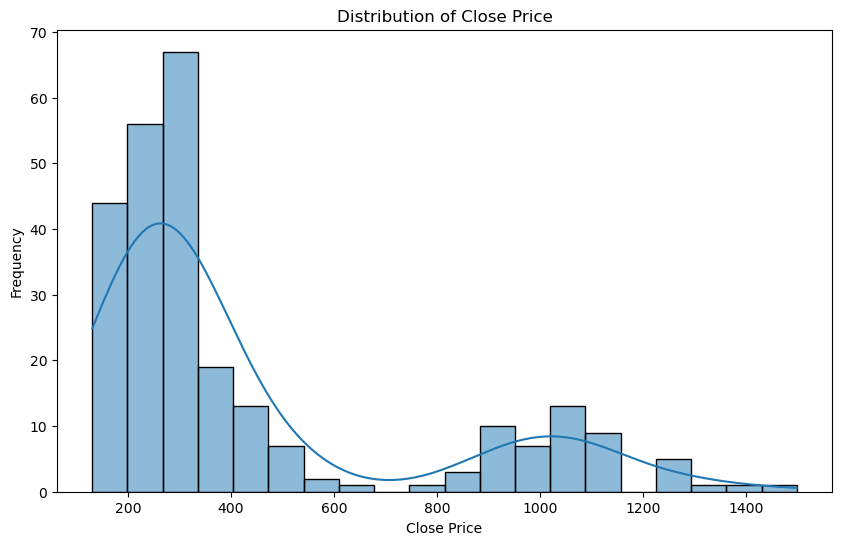

In [7]:
# Plot the distribution of the target variable 'Close'
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], bins=20, kde=True)
plt.title('Distribution of Close Price')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

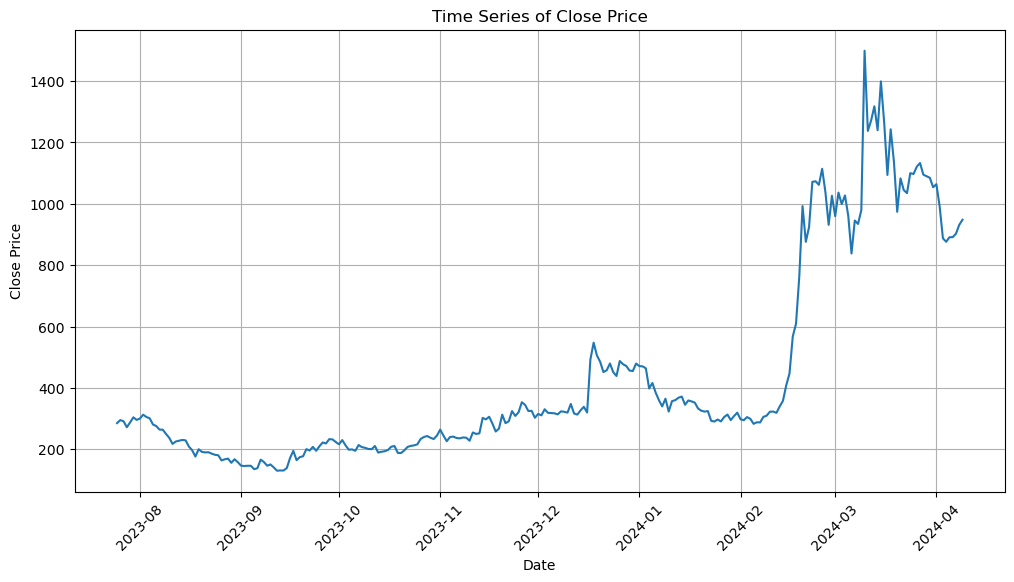

In [8]:
# Plot time series of 'Close' price
plt.figure(figsize=(12, 6))
plt.plot(df['End'], df['Close'], linestyle='-')
plt.title('Time Series of Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Model Development

In [9]:
X = df[["Open", "High", "Low", "Volume", "Market Cap"]]
y = df["Close"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:

model = RandomForestRegressor(random_state=42)

model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [11]:

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:",mse)

Mean Squared Error: 4514.867846434541


In [12]:

# Initialize the models
linear_reg_model = LinearRegression()
gradient_boosting_model = GradientBoostingRegressor(random_state=42)
svr_model = SVR()

# Train the models
linear_reg_model.fit(X_train, y_train)
gradient_boosting_model.fit(X_train, y_train)
svr_model.fit(X_train, y_train)

# Make predictions
linear_reg_predictions = linear_reg_model.predict(X_test)
gradient_boosting_predictions = gradient_boosting_model.predict(X_test)
svr_predictions = svr_model.predict(X_test)

# Evaluate the models
linear_reg_mse = mean_squared_error(y_test, linear_reg_predictions)
gradient_boosting_mse = mean_squared_error(y_test, gradient_boosting_predictions)
svr_mse = mean_squared_error(y_test, svr_predictions)

print("Linear Regression Mean Squared Error:", linear_reg_mse)
print("Gradient Boosting Mean Squared Error:", gradient_boosting_mse)
print("Support Vector Regressor Mean Squared Error:", svr_mse)


Linear Regression Mean Squared Error: 1308.8233531613478
Gradient Boosting Mean Squared Error: 3627.320999857142
Support Vector Regressor Mean Squared Error: 154799.92675090255


### Testing the models

In [24]:
# Request input for the trained model
print("Please provide input for the trained model:")
open_price = float(input("Enter the opening price: "))
high_price = float(input("Enter the highest price: "))
low_price = float(input("Enter the lowest price: "))
volume = float(input("Enter the volume: "))
market_cap = float(input("Enter the market cap: "))

# Create a DataFrame with the input data
input_data = {
    "Open": [open_price],
    "High": [high_price],
    "Low": [low_price],
    "Volume": [volume],
    "Market Cap": [market_cap]
}

input_df = pd.DataFrame(input_data)

# Make prediction using the trained model
prediction = model.predict(input_df)
print("Predicted Close Price:", prediction)


Please provide input for the trained model:
Predicted Close Price: [1003.83447517]


In [26]:
# Request input for the trained model
print("Please provide input for the trained model:")
open_price = float(input("Enter the opening price: "))
high_price = float(input("Enter the highest price: "))
low_price = float(input("Enter the lowest price: "))
volume = float(input("Enter the volume: "))
market_cap = float(input("Enter the market cap: "))

# Create a DataFrame with the input data
input_data = {
    "Open": [open_price],
    "High": [high_price],
    "Low": [low_price],
    "Volume": [volume],
    "Market Cap": [market_cap]
}

input_df = pd.DataFrame(input_data)

# Make prediction using the trained model
prediction = linear_reg_model.predict(input_df)
print("Predicted Close Price:", prediction)


Please provide input for the trained model:
Predicted Close Price: [1034.3342983]
